<a href="https://colab.research.google.com/github/akifkashif/Captsone-Project---Data-Application-Energy-Linear-Regression-/blob/main/Captsone_Project_Data_Application_Energy(Linear_Regression)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px  
from datetime import datetime 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
df = pd.read_csv('/content/drive/MyDrive/data_application_energy.csv',parse_dates=['date'])

In [223]:
df['Date'] = df['date']

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
df.shape

(19735, 30)

In [ ]:
df.describe(include= "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19735
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-11 17:00:00
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
first,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-11 17:00:00
last,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-27 18:00:00
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,NaN
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,NaN
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,NaN
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,NaN


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ccba7db90>,
      dtype=object)

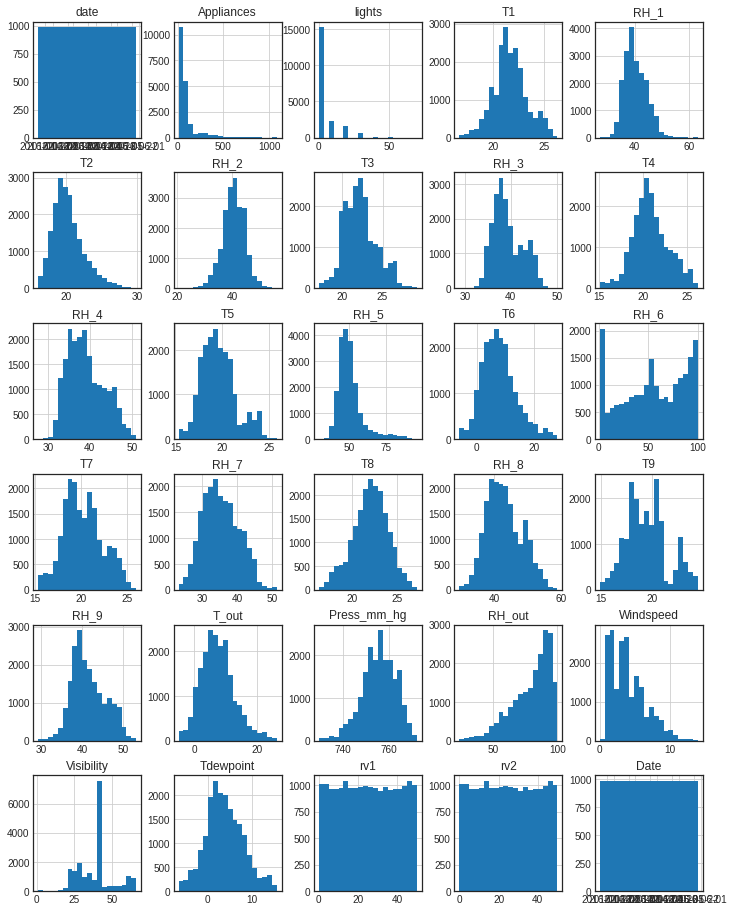

In [ ]:
df.hist(bins = 20 , figsize= (12,16))

Text(1, 17, 'y = 88.01 + 2.55x')

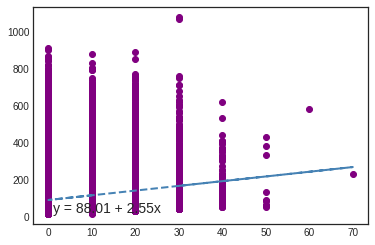

In [ ]:
#@title
x =df["lights"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 20.93 + 3.54x')

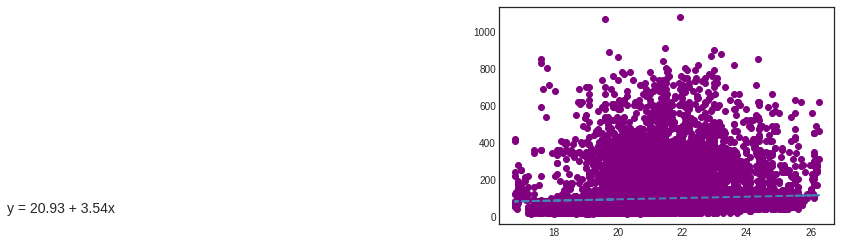

In [ ]:
#@title
x =df["T1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 8.46 + 2.22x')

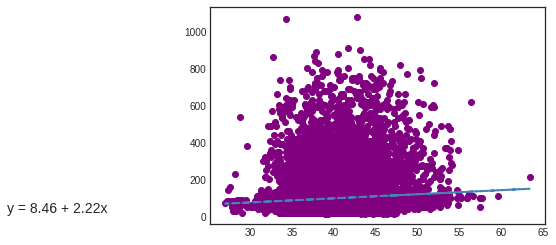

In [305]:
#@title
x =df["RH_1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x,y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

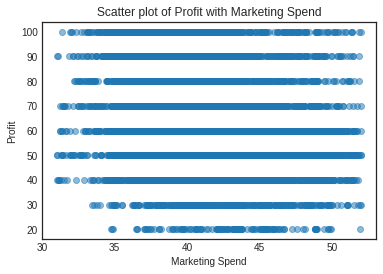

In [308]:
plt.scatter(df2['RH_8'], df2['Appliances'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

Text(1, 17, 'y = -16.49 + 5.61x')

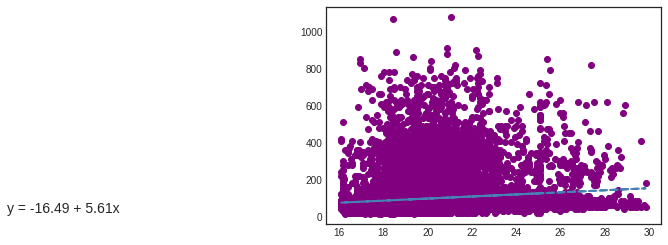

In [ ]:
#@title
x =df["T2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 159.26 + -1.52x')

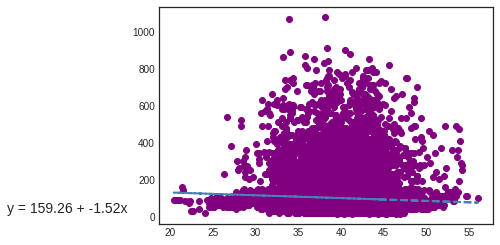

In [ ]:
#@title
x =df["RH_2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 0.90 + 4.35x')

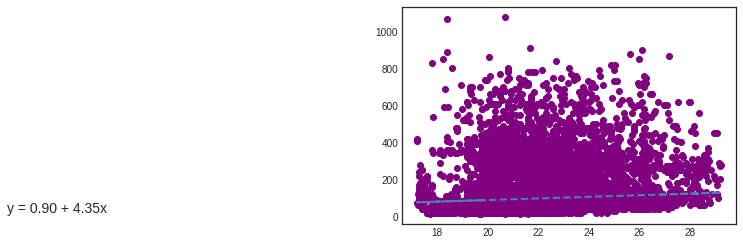

In [ ]:
#@title
x =df["T3"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 52.83 + 1.14x')

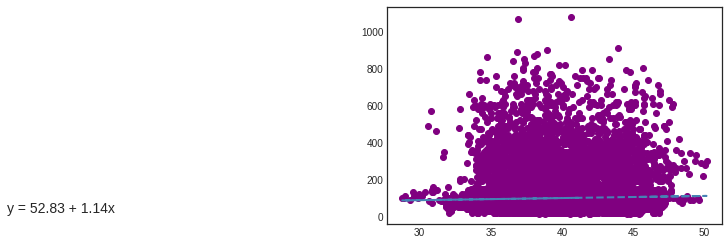

In [ ]:
#@title
x =df["RH_3"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 55.53 + 2.02x')

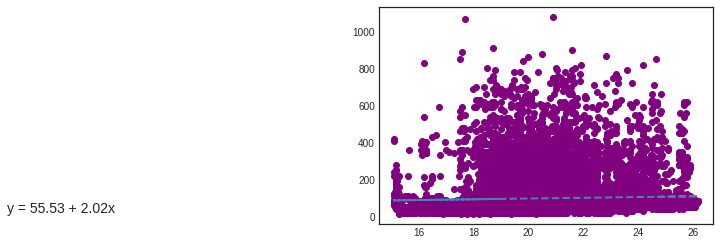

In [ ]:
#@title
x =df["T4"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.06 + 0.40x')

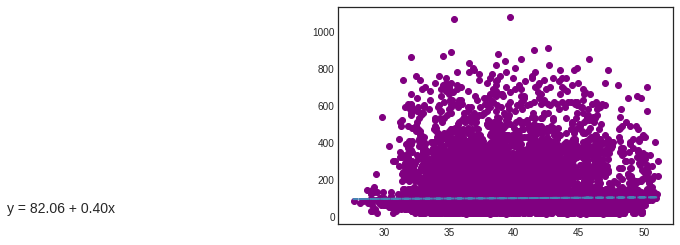

In [ ]:
#@title
x =df["RH_4"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 76.18 + 1.10x')

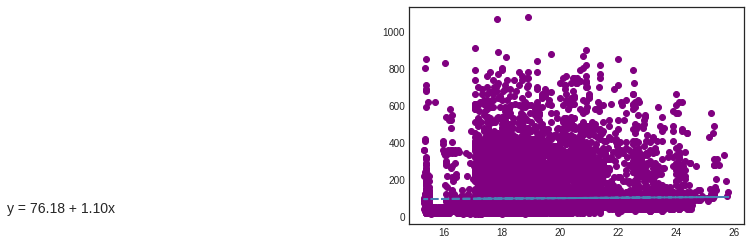

In [ ]:
#@title Default title text
x =df["T5"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 93.67 + 0.08x')

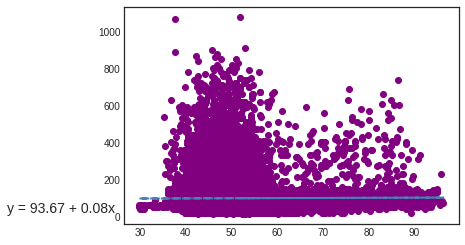

In [ ]:
#@title Default title text
x =df["RH_5"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.03 + 1.98x')

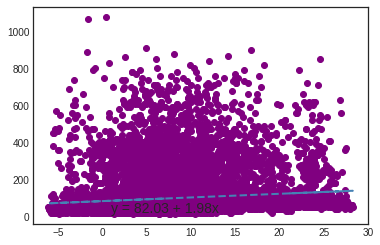

In [ ]:
#@title
x =df["T6"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 112.65 + -0.27x')

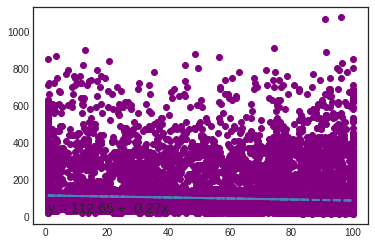

In [ ]:
#@title
x =df["RH_6"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 72.29 + 1.25x')

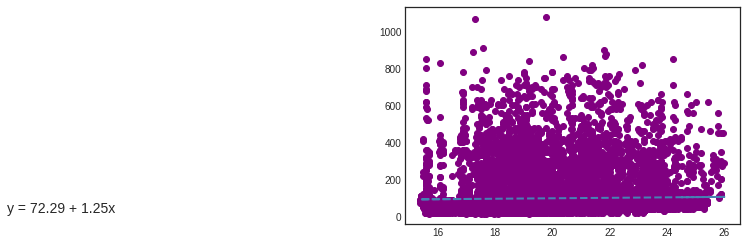

In [ ]:
#@title
x =df["T7"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 137.17 + -1.12x')

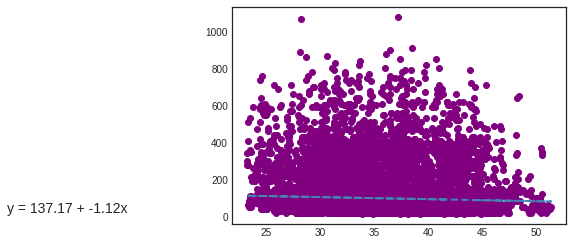

In [ ]:
#@title
x =df["RH_7"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 52.01 + 2.07x')

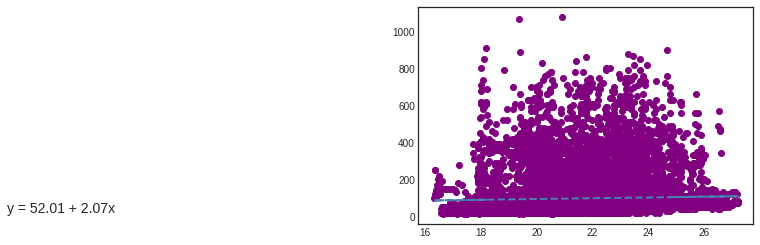

In [ ]:
#@title
x =df["T8"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 176.93 + -1.85x')

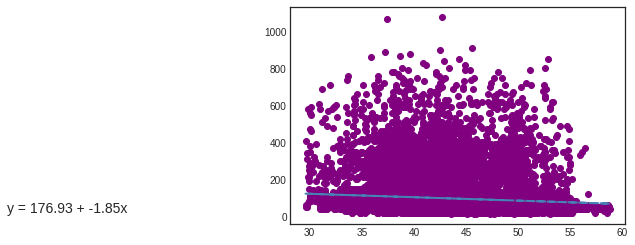

In [ ]:
#@title
x =df["RH_8"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 87.77 + 0.51x')

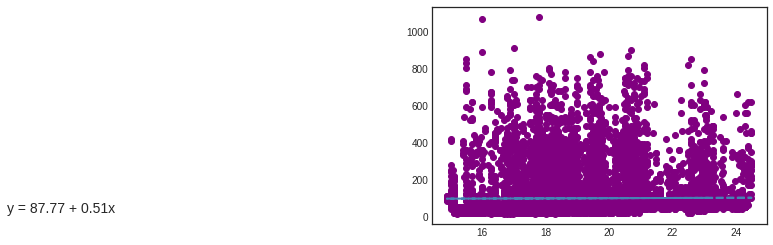

In [ ]:
#@title
x =df["T9"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 150.50 + -1.27x')

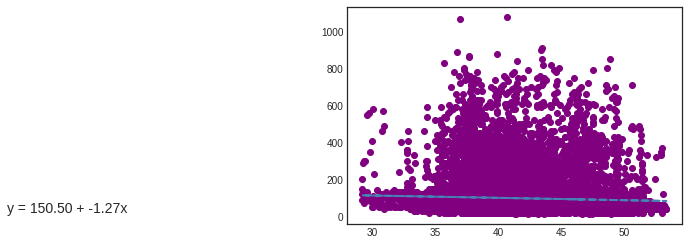

In [ ]:
#@title
x =df["RH_9"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 83.53 + 1.91x')

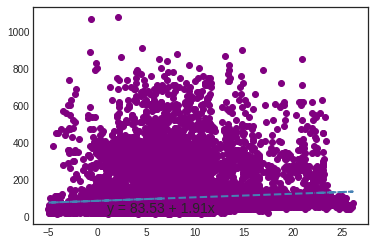

In [ ]:
#@title
x =df["T_out"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Date'],
      dtype='object')

Text(1, 17, 'y = 462.88 + -0.48x')

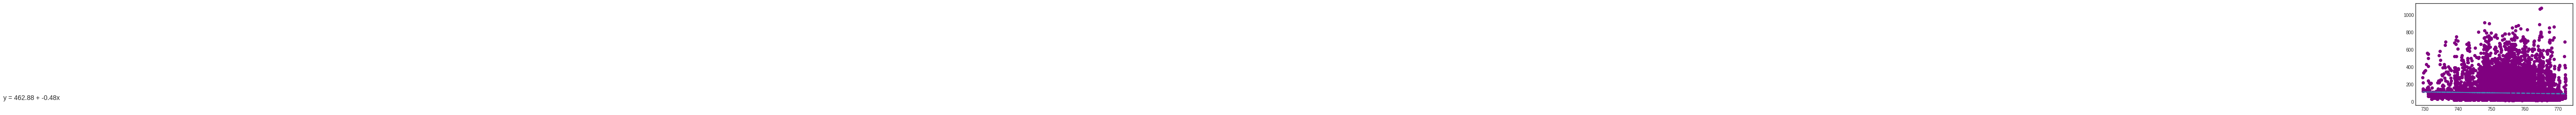

In [ ]:
#@title
x =df["Press_mm_hg"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 181.25 + -1.05x')

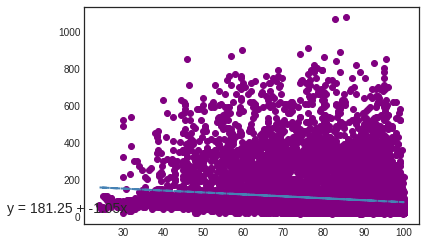

In [ ]:
#@title
x =df["RH_out"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.97 + 3.64x')

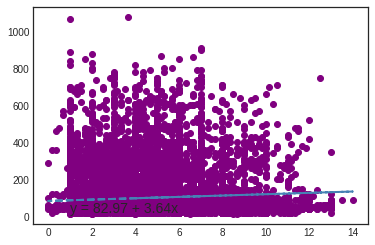

In [ ]:
#@title
x =df["Windspeed"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 97.62 + 0.00x')

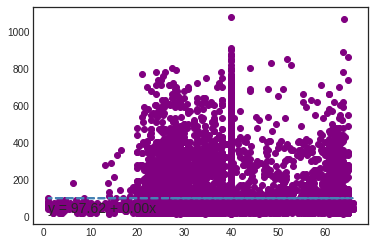

In [ ]:
#@title
x =df["Visibility"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 96.28 + 0.38x')

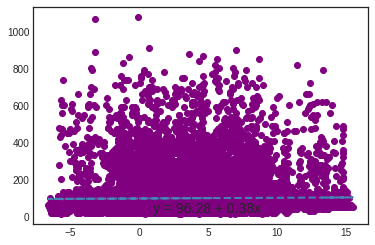

In [ ]:
#@title
x =df["Tdewpoint"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 99.66 + -0.08x')

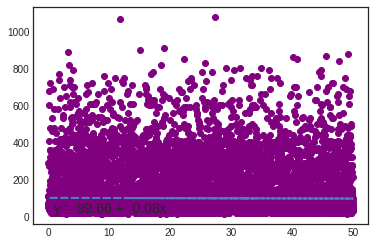

In [ ]:
#@title
x =df["rv1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 99.66 + -0.08x')

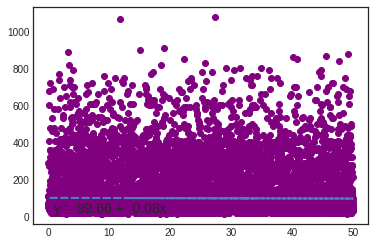

In [ ]:
#@title
x =df["rv2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [ ]:
df = df.set_index('date')

In [ ]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['week'] = df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,month,weekday,hour,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11 17:00:00,1,0,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11 17:10:00,1,0,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11 17:20:00,1,0,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11 17:30:00,1,0,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11 17:40:00,1,0,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27 17:20:00,5,4,17,21
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27 17:30:00,5,4,17,21
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27 17:40:00,5,4,17,21


In [ ]:
df['week'].value_counts()

12    1008
20    1008
18    1008
17    1008
16    1008
15    1008
14    1008
13    1008
3     1008
11    1008
10    1008
9     1008
8     1008
7     1008
6     1008
5     1008
4     1008
19    1008
2      906
21     685
Name: week, dtype: int64

In [ ]:
df.weekday.value_counts()

1    2880
2    2880
3    2880
4    2845
0    2778
5    2736
6    2736
Name: weekday, dtype: int64

In [ ]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'Date', 'month', 'weekday', 'hour', 'week'],
      dtype='object')

In [ ]:
df['day_of_week'] = df['Date'].dt.day_name()

In [ ]:
df['Type of week'] = ((pd.to_datetime(df['Date']).dt.dayofweek)// 5 == 1).astype(int)
df['Type of week'].value_counts()
# There are 5472 weekend recordings 

0    14263
1     5472
Name: Type of week, dtype: int64

In [ ]:
df.groupby('hour')['Appliances'].mean().sort_values( ascending= False)

hour
18    190.364520
17    161.352657
19    143.065693
11    133.126521
20    126.982968
10    125.377129
13    124.744526
12    123.637470
16    119.902676
9     112.785888
14    108.284672
8     106.143552
15    105.827251
21     96.496350
7      78.649635
22     69.148418
6      57.712895
23     56.982968
0      52.785888
5      52.737226
1      51.326034
4      49.355231
2      49.075426
3      48.236010
Name: Appliances, dtype: float64

In [ ]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Tdewpoint,rv1,rv2,Date,month,weekday,hour,week,day_of_week,Type of week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,0,17,2,Monday,0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,0,17,2,Monday,0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,0,17,2,Monday,0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,45.410389,45.410389,2016-01-11 17:30:00,1,0,17,2,Monday,0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,0,17,2,Monday,0


In [ ]:
# At 18th hour, the usage of appliances is at max

In [ ]:
df.groupby('weekday')['Appliances'].mean().sort_values( ascending= False)

weekday
0    111.450684
5    106.246345
4    104.622144
6     94.915936
3     90.434028
2     89.930556
1     87.125000
Name: Appliances, dtype: float64

In [ ]:
# On Sunday, the usage of appliances is at max

In [ ]:
df.groupby('week')['Appliances'].mean().sort_values( ascending= False)

week
2     121.953642
14    116.230159
11    113.581349
6     113.164683
21    107.912409
15    105.674603
5      98.888889
9      97.251984
3      96.190476
7      95.704365
17     95.704365
19     95.654762
12     95.218254
16     94.166667
20     93.561508
10     90.674603
8      87.996032
18     83.541667
13     81.101190
4      75.456349
Name: Appliances, dtype: float64

In [ ]:
# On week 2 , the usage of appliances is at max

In [ ]:
df.groupby('month')['Appliances'].mean().sort_values( ascending= False)

month
2    100.945881
4     98.888889
1     97.026010
3     96.953405
5     94.199325
Name: Appliances, dtype: float64

In [ ]:
df['month'].value_counts()

3    4464
4    4320
2    4176
5    3853
1    2922
Name: month, dtype: int64

In [ ]:
# From the data in the period of months Jan to May, the appliances usage is max on Feb

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [263]:
for col in ['Appliances', 'RH_2', 'T4', 'RH_5', 'T8', 'RH_8', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']:
  outliers = find_outliers_IQR(df2[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))
  
  outliers

column name is Appliances
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is RH_2
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is T4
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is RH_5
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is T8
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is RH_8
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is RH_9
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is Press_mm_hg
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is RH_out
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is Windspeed
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is Visibility
number of outliers: 0
max outlier value: nan
min outlier value: nan
column nam

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

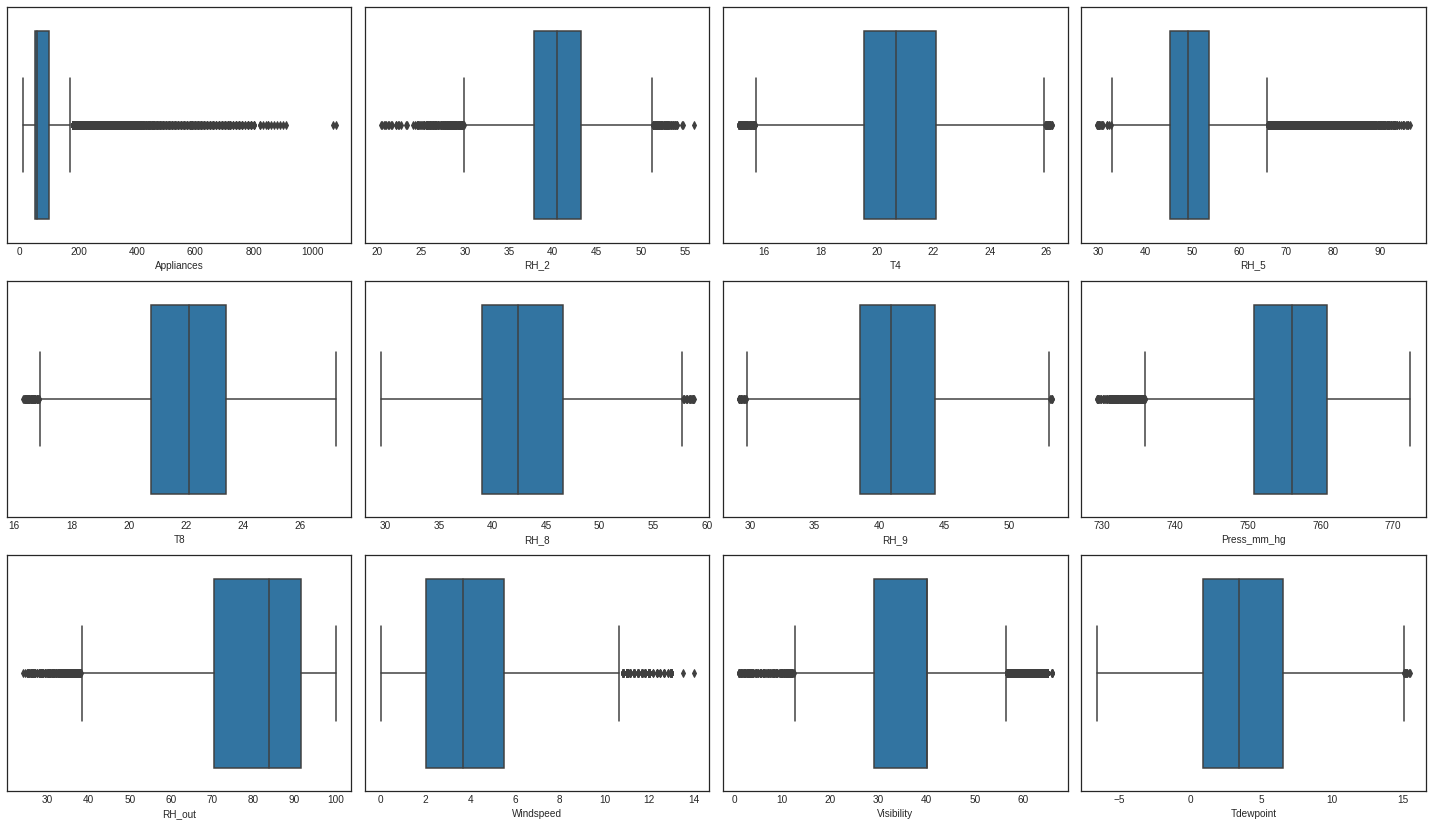

In [219]:
columns = ['Appliances', 'RH_2', 'T4', 'RH_5', 'T8', 'RH_8', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
n = 1
plt.figure(figsize=(20,15))
for i in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[i])
  plt.tight_layout()

In [231]:
df2 = df2[(df2['Appliances'] < 101) & (df2['Appliances'] > 18)] 
df2 = df2[(df2['RH_2'] < 48) & (df2['RH_2'] > 31) ]
df2 = df2[ (df2['T4'] > 16) ]
df2 = df2[(df2['RH_5'] < 60) ]
df2 = df2[(df2['T8'] > 18) ]
df2 = df2[(df2['RH_8'] < 52) & (df2['RH_8'] > 31)  ]
df2 = df2[(df2['RH_9'] < 49) & (df2['RH_9'] > 33)  ]
df2 = df2[(df2['Press_mm_hg'] > 738)  ]
df2 = df2[ (df2['RH_out'] > 44)  ]
df2 = df2[(df2['Windspeed'] < 9)  ]
df2 = df2[(df2['Visibility'] < 58) & (df2['Visibility'] > 11)  ]
df2 = df2[(df2['Tdewpoint'] < 13)  ]

In [ ]:
df.isna().sum()

Appliances      0
lights          0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
rv1             0
rv2             0
Date            0
month           0
weekday         0
hour            0
week            0
day_of_week     0
Type of week    0
dtype: int64

In [ ]:
gg = list(df.describe().columns)
g = ['month', 'weekday', 'hour', 'week','WEEKDAY', 'Type of week']


In [ ]:
gg

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'month',
 'weekday',
 'hour',
 'week',
 'Type of week']

In [ ]:
gg.remove('month')
gg.remove('weekday')
gg.remove('hour')
gg.remove('week')

In [ ]:
gg.remove('Type of week')

In [ ]:
gg

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [ ]:
df.shape

(19735, 35)

In [ ]:
df1 = df.copy()

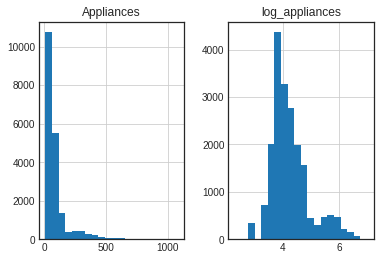

In [ ]:
df1['log_appliances'] = np.log(df.Appliances) 
appliance = ["Appliances","log_appliances"]
appliance=df1[appliance]
appliance.hist(bins = 20 ) ;

In [ ]:
#We have applied log transformation to the column appliance which is skewed towards right and the compared the distributions

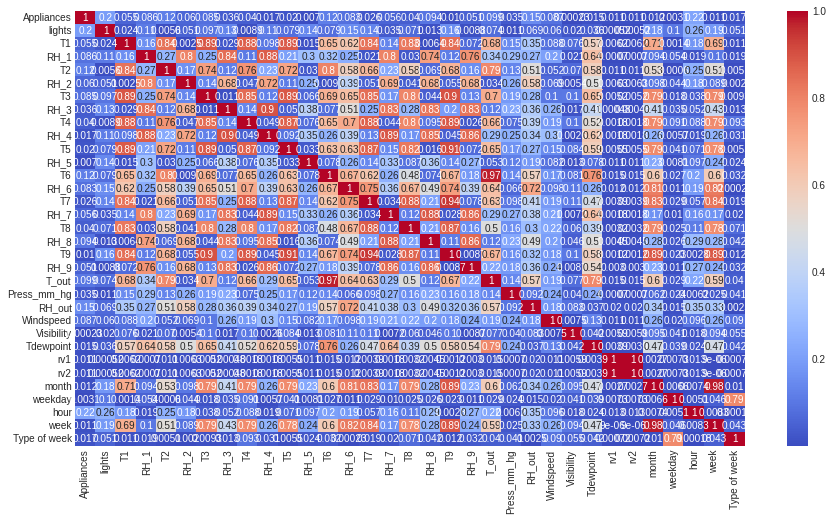

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
considered_features = gg.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



,Variable,VIF
27,rv2,inf
26,rv1,inf
20,T_out,147.180685
25,Tdewpoint,86.180518
22,RH_out,49.263547
12,T6,33.681195
4,T2,28.977770
18,T9,28.396176
5,RH_2,22.238196
2,T1,19.671790


In [ ]:
considered_features.remove('rv1')
considered_features.remove('rv2')

In [ ]:

compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
20,T_out,147.179004
25,Tdewpoint,86.179275
22,RH_out,49.262101
12,T6,33.680830
4,T2,28.977441
18,T9,28.392700
5,RH_2,22.237582
2,T1,19.671741
14,T7,17.504287
9,RH_4,17.129452


In [ ]:
considered_features.remove('T_out')

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
4,T2,28.547360
18,T9,28.311261
12,T6,26.438300
5,RH_2,21.982339
2,T1,19.416310
24,Tdewpoint,19.183933
14,T7,17.472370
9,RH_4,17.098364
3,RH_1,16.338986
15,RH_7,10.826326


In [ ]:
considered_features.remove('T2')

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
17,T9,27.508141
11,T6,24.080289
23,Tdewpoint,18.775012
13,T7,17.290671
8,RH_4,15.944149
2,T1,11.791918
14,RH_7,10.755782
6,RH_3,10.575949
3,RH_1,10.506486
5,T3,10.261646


In [ ]:
considered_features.remove('T9')

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
11,T6,23.541120
22,Tdewpoint,18.769697
8,RH_4,15.934475
13,T7,12.451475
2,T1,11.440427
3,RH_1,10.486226
6,RH_3,10.408050
14,RH_7,10.232757
5,T3,9.667184
19,RH_out,9.088088


In [ ]:
considered_features.remove('T6')

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
8,RH_4,15.682458
12,T7,12.450834
2,T1,11.347104
6,RH_3,10.347441
3,RH_1,10.235378
13,RH_7,10.232754
5,T3,9.624421
9,T5,8.956081
7,T4,8.891361
11,RH_6,8.423179


In [ ]:
considered_features.remove('RH_4')

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
11,T7,12.200921
2,T1,10.613772
6,RH_3,9.702593
12,RH_7,9.537376
5,T3,9.514882
3,RH_1,9.005573
8,T5,8.710849
10,RH_6,8.396540
14,RH_8,8.323626
13,T8,7.884784


In [ ]:
considered_features.remove('T7')

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
2,T1,10.508692
6,RH_3,9.607479
5,T3,9.410238
3,RH_1,8.988733
11,RH_7,8.549297
10,RH_6,8.291984
8,T5,8.255735
13,RH_8,7.105354
7,T4,6.959586
12,T8,5.777923


In [ ]:
considered_features.remove('T1')

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
5,RH_3,9.181128
2,RH_1,8.918181
10,RH_7,8.439764
9,RH_6,7.905058
7,T5,7.827456
4,T3,7.703840
12,RH_8,6.994850
6,T4,6.480379
13,RH_9,5.747687
3,RH_2,5.304523


In [ ]:
considered_features.remove('RH_3')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
9,RH_7,8.150348
6,T5,7.826565
4,T3,7.676241
8,RH_6,7.209739
11,RH_8,6.799097
5,T4,6.480167
2,RH_1,6.352323
12,RH_9,5.410995
3,RH_2,5.260246
10,T8,4.856385


In [ ]:
considered_features.remove('RH_7')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
6,T5,7.697325
4,T3,7.644452
8,RH_6,7.094107
5,T4,6.441526
2,RH_1,6.237462
10,RH_8,5.510067
3,RH_2,5.259477
11,RH_9,5.003889
9,T8,4.664168
13,RH_out,4.374995


In [ ]:
considered_features.remove('T5')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
7,RH_6,7.071174
4,T3,6.712503
2,RH_1,6.237456
5,T4,5.528596
9,RH_8,5.502235
3,RH_2,5.234705
10,RH_9,4.999580
12,RH_out,4.374904
8,T8,4.236144
15,Tdewpoint,3.962726


In [ ]:
considered_features.remove('RH_6')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
4,T3,6.280731
2,RH_1,6.112029
5,T4,5.440569
8,RH_8,5.324712
3,RH_2,5.192921
9,RH_9,4.734955
7,T8,4.205567
14,Tdewpoint,3.402570
11,RH_out,2.942458
12,Windspeed,1.505442


In [ ]:
considered_features.remove('T3')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
2,RH_1,6.112028
7,RH_8,5.314288
3,RH_2,5.167113
8,RH_9,4.667591
4,T4,4.154169
6,T8,3.519391
13,Tdewpoint,3.134520
10,RH_out,2.925716
11,Windspeed,1.505135
9,Press_mm_hg,1.266453


In [ ]:
considered_features.remove('RH_1')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
6,RH_8,5.133262
7,RH_9,4.494485
3,T4,4.096669
5,T8,3.323806
2,RH_2,2.977229
12,Tdewpoint,2.946408
9,RH_out,2.526975
10,Windspeed,1.498410
8,Press_mm_hg,1.235748
4,RH_5,1.211529


In [303]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
6,RH_8,5.133262
7,RH_9,4.494485
3,T4,4.096669
5,T8,3.323806
2,RH_2,2.977229
12,Tdewpoint,2.946408
9,RH_out,2.526975
10,Windspeed,1.498410
8,Press_mm_hg,1.235748
4,RH_5,1.211529


In [ ]:
len(considered_features)

13

In [224]:
df2 = pd.read_csv('/content/drive/MyDrive/data_application_energy.csv',parse_dates=['date'])

In [225]:
df2.drop(columns = (['date']), inplace =  True)

In [226]:
df2.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [227]:
df2 = df2[considered_features].copy()

In [228]:
df2.head()

,Appliances,lights,RH_2,T4,RH_5,T8,RH_8,RH_9,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,44.790000,19.000000,55.20,18.2,48.900000,45.53,733.5,92.0,7.000000,63.000000,5.3
1,60,30,44.722500,19.000000,55.20,18.2,48.863333,45.56,733.6,92.0,6.666667,59.166667,5.2
2,50,30,44.626667,18.926667,55.09,18.2,48.730000,45.50,733.7,92.0,6.333333,55.333333,5.1
3,50,40,44.590000,18.890000,55.09,18.1,48.590000,45.40,733.8,92.0,6.000000,51.500000,5.0
4,60,40,44.530000,18.890000,55.09,18.1,48.590000,45.40,733.9,92.0,5.666667,47.666667,4.9


In [276]:
y = df2.iloc[:,:1]
X = df2.iloc[:,2:]

In [277]:
df2.iloc[:,2:]

,RH_2,T4,RH_5,T8,RH_8,RH_9,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
92,45.044444,19.20,52.200000,18.79,51.395000,48.026667,741.966667,91.000000,5.000000,40.000000,3.666667
93,45.200000,19.10,52.400000,18.70,51.045000,47.766667,742.050000,91.000000,5.000000,40.000000,3.600000
94,45.126667,19.10,52.500000,18.70,50.760000,47.466667,742.133333,91.000000,5.000000,40.000000,3.533333
95,45.090000,19.10,52.560000,18.70,50.645000,47.266667,742.216667,91.000000,5.000000,40.000000,3.466667
96,45.030000,19.10,52.790000,18.70,50.420000,46.930000,742.300000,91.000000,5.000000,40.000000,3.400000
...,...,...,...,...,...,...,...,...,...,...,...
19668,46.428571,24.29,54.430000,24.10,48.433333,46.745000,755.800000,89.000000,1.000000,48.000000,11.700000
19669,46.290000,24.29,54.156667,24.00,48.163333,46.560000,755.800000,88.500000,1.166667,49.166667,11.700000
19670,46.290000,24.29,53.966667,24.00,48.030000,46.500000,755.800000,88.000000,1.333333,50.333333,11.700000
19675,46.680000,24.29,53.250000,24.00,47.790000,46.400000,755.850000,85.333333,2.166667,56.000000,11.750000
